In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile

In [2]:
import owncloud
import os

if not os.path.exists('data'):
    print('Creating directory for data')
    os.mkdir('data')

if not os.path.exists('data/demoMovie.tif'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/NwtdrIg5wGdeGcB')
    oc.get_file('/', 'data/demoMovie.tif');

if not os.path.exists('data/F.npy'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/Gy3IXkMz3J5drwJ')
    oc.get_file('/', 'data/F.npy');

if not os.path.exists('data/Fneu.npy'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/4sL0IyGnGFgcWyj')
    oc.get_file('/', 'data/Fneu.npy');

if not os.path.exists('data/iscell.npy'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/Dp8dAdojbDs7Vpc')
    oc.get_file('/', 'data/iscell.npy');

if not os.path.exists('data/ops.npy'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/oHULKwKSMhUrLPA')
    oc.get_file('/', 'data/ops.npy');

if not os.path.exists('data/spks.npy'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/dgufx5qN22SUoGg')
    oc.get_file('/', 'data/spks.npy');

if not os.path.exists('data/stat.npy'):
    oc = owncloud.Client.from_public_link('https://uni-bonn.sciebo.de/s/StGQCaqIvNwrtuy')
    oc.get_file('/', 'data/stat.npy');

In [3]:
data = tifffile.imread('data/demoMovie.tif')

# Outputs From Suite2p

| **File**     | **Description**                                                                                                                                                                                       |
| :----------- | :---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| `F.npy`      | Array containing fluorescence traces for each ROI (regions of interest) over timepoints.                                                                                                              |
| `Fneu.npy`   | Array containing neuropil fluorescence traces for each ROI (regions of interest) over timepoints.                                                                                                     |
| `spks.npy`   | Array containing deconvolved traces for each ROI (regions of interest) over timepoints.                                                                                                               |
| `stat.npy`   | List of statistics computed for each cell (one value per ROI).                                                                                                                                        |
| `iscell.npy` | Array indicating whether an ROI corresponds to a cell. The first column shows 0/1 (cell or not), and the second column gives the probability of the ROI being a cell based on the default classifier. |


## Loading Outputs From Suite2p

| **Code**                                   | **Description**                                                                             |
| :----------------------------------------- | :------------------------------------------------------------------------------------------ |
| `np.load('F.npy')`                    | Load the **F.npy** without allowing pickled objects.       |
| `np.load('F.npy', allow_pickle=True)` | Load the **F.npy** and allow pickled objects to be loaded. |


**Example** Load F.npy as f_cells

In [4]:
f_cells = np.load('data/F.npy')

Load Fneu.npy  as f_neu

In [5]:
f_neu = np.load('data/Fneu.npy')

Load iscell.npy  as iscell

In [6]:
iscell = np.load('data/iscell.npy')

Load spks.npy as spks

In [7]:
spks = np.load('data/spks.npy')

Load stat.npy as stats

In [8]:
stats = np.load('data/stat.npy', allow_pickle=True)

## F.npy and Fneu.npy

| **Code**               | **Description**                                                        |
| :--------------------- | :--------------------------------------------------------------------- |
| `f_cells[1]`           | Access the second element (index 1) of the **f\_cells** list or array. |
| `plt.plot(f_cells[1])` | Plot the second element (index 1) of **f\_cells** using Matplotlib.    |

Plot cell fluorescence of second cell.

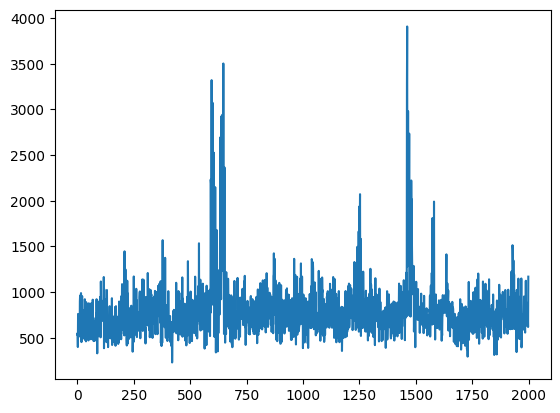

In [9]:
plt.plot(f_cells[1])

Plot cell fluorescence of ninth cell.

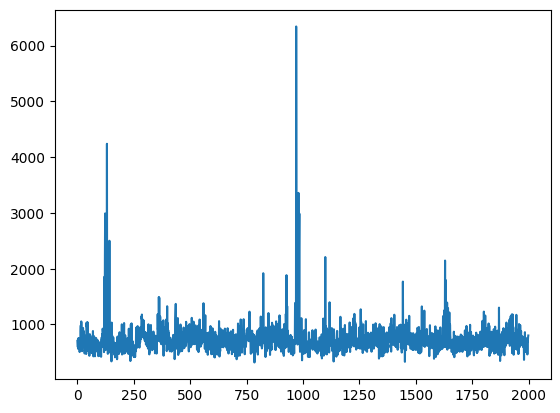

In [10]:
plt.plot(f_cells[8])

Plot cell fluorescence of last cell.

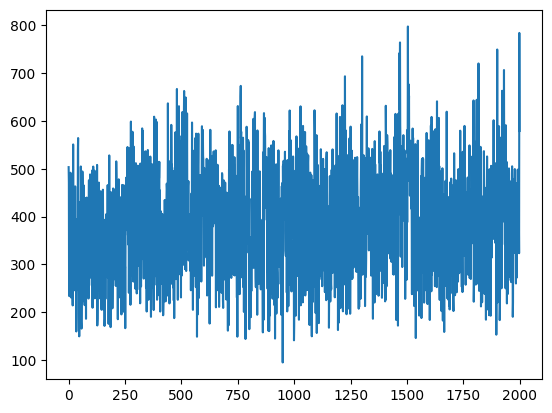

In [11]:
plt.plot(f_cells[-1])

**Example** Plot neuropil fluorescence of second cell.

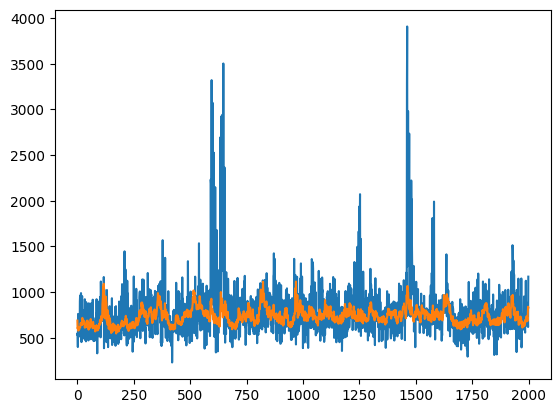

In [12]:
plt.plot(f_cells[1])
plt.plot(f_neu[1])

Plot neuropil fluorescence of ninth cell.

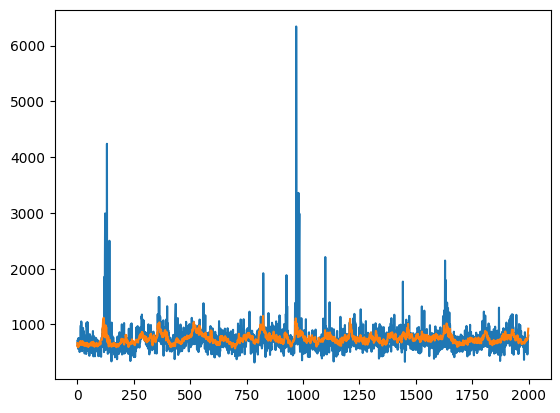

In [13]:
plt.plot(f_cells[8])
plt.plot(f_neu[8])

Plot neuropil fluorescence of last cell.

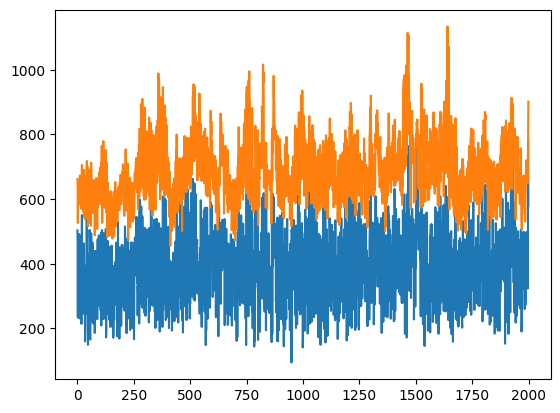

In [14]:
plt.plot(f_cells[-1])
plt.plot(f_neu[-1])

**Example** Plot deconvolved traces from cell 2.

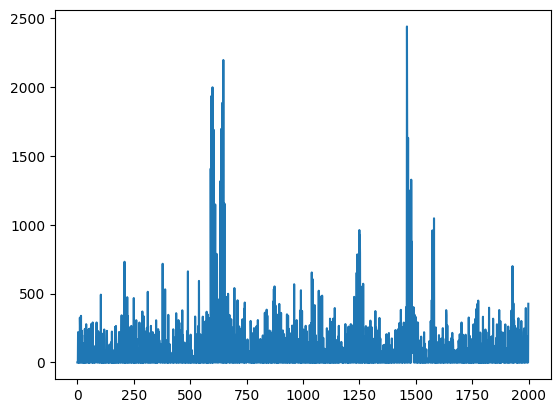

In [15]:
plt.plot(spks[1])

Plot deconvolved traces from cell 9.

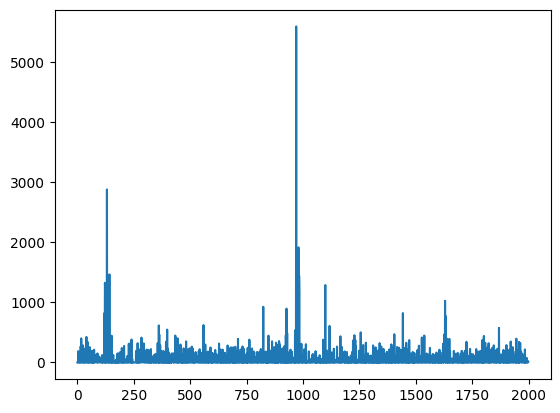

In [16]:
plt.plot(spks[8])

Plot deconvolved traces from last cell.

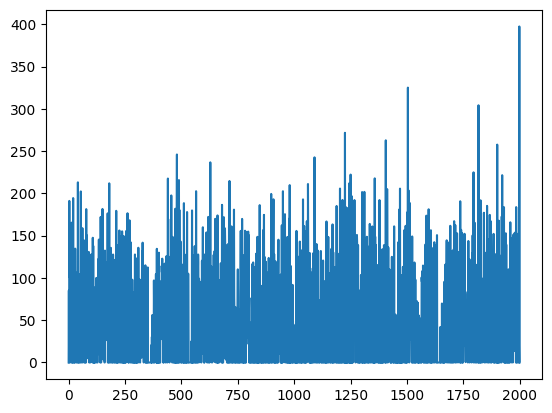

In [17]:
plt.plot(spks[-1])

## stat.npy

| **Code**         | **Description**                                                                                           |
| :--------------- | :-------------------------------------------------------------------------------------------------------- |
| `stat['npix']`   | Access the **npix** value from the **stat** dictionary, typically representing the number of pixels.      |
| `stat['radius']` | Access the **radius** value from the **stat** dictionary, typically representing the radius of an object. |


**Example** How many pixels are in cell 2?

In [18]:
stat = stats[1]
stat['npix']

87

How many pixels are in cell 9?

In [19]:
stat = stats[8]
stat['npix']

72

How many pixels are in last cell?

In [20]:
stat = stats[-1]
stat['npix']

27

**Example** What is the estimated radius of the cell 1?

In [21]:
stat = stats[1]
stat['radius']

5.451918711470707

What is the estimated radius of the cell 9?

In [22]:
stat = stats[8]
stat['radius']

6.043492071503493

What is the estimated radius of the last cell?

In [23]:
stat = stats[-1]
stat['radius']

3.7941102075470083

## iscell

| **Code**         | **Description**                                                                         |
| :--------------- | :-------------------------------------------------------------------------------------- |
| `ic = iscell[1]` | Assign the second element (index 1) of **iscell** to the variable **ic**.               |
| `ic[0]`          | Access the first value in **ic**, which indicates whether it is a cell (True/False).    |
| `ic[1]`          | Access the second value in **ic**, which represents the probability of it being a cell. |

**Example** Is the first ROI a cell?

In [24]:
ic = iscell[1]
ic[0]

1.0

Is the ninth ROI a cell?

In [25]:
ic = iscell[8]
ic[0]

1.0

Is the last ROI a cell?

In [26]:
ic = iscell[-1]
ic[0]

0.0

**Example** What is the probability the the second ROI is a cell?

In [27]:
ic = iscell[1]
ic[1]

0.9210297260107835

What is the probability the the ninth ROI is a cell?

In [28]:
ic = iscell[8]
ic[1]

0.9255357019841599

What is the probability the the last ROI is a cell?

In [29]:
ic = iscell[-1]
ic[1]

0.32886717088160167

**Bonus** How many cells are true cells according to Suite2p classifier?

In [50]:
len(np.where(iscell[:, 0] == 1)[0])

44

How many cells are not true cells?

In [51]:
len(np.where(iscell[:, 0] == 0)[0])

70